# sonarlight 
## Example notebook

### Load sonar data

Use own sonar log files in '.sl2' or '.sl3' format or download example data files from https://github.com/KennethTM/sonarlight/tree/main/example_files.

In [ ]:
import sonarlight
from sonarlight import Sonar

#Package version
print(sonarlight.__version__)

#Read data from a '.sl2' or '.sl3' file
sl3 = Sonar('/home/kayatroyer/Repositories/Sonar/sonarlight/real_files/Sonar_2024-08-08_11.41.57.sl3') #add path to sl3 file

0.1.7


In [21]:
#See summary of data and available channels
sl3

Summary of SL3 file:

- Primary channel with 34666 frames
- Secondary channel with 28997 frames

Start time: 2024-08-08 17:48:17.233999968
End time: 2024-08-08 22:20:24.088000059

File info: version 3, device 2, blocksize 3200, frame version 13

In [4]:
#View raw data store in Pandas dataframe
sl3.df

,id,survey,datetime,x,y,longitude,latitude,min_range,max_range,water_depth,gps_speed,gps_heading,gps_altitude,bottom_index,frames
4266,711,primary,2024-08-08 17:48:17.233999968,-16590402,8355661,-149.535481,59.928202,0.0,79.979515,0.484899,0.067529,0.680684,20.709999,18,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 133, 133,..."
4269,711,secondary,2024-08-08 17:48:17.233999968,-16590402,8355661,-149.535481,59.928202,0.0,79.979515,0.484899,0.067821,0.680684,20.709999,18,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 133, 133,..."
4272,712,primary,2024-08-08 17:48:17.253999949,-16590402,8355661,-149.535481,59.928202,0.0,3.992880,0.484899,0.067821,0.680684,20.709999,374,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 208, 208,..."
4275,712,secondary,2024-08-08 17:48:17.253999949,-16590402,8355661,-149.535481,59.928202,0.0,3.992880,0.484899,0.067821,0.680684,20.709999,374,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 208, 208,..."
4278,713,primary,2024-08-08 17:48:17.380000114,-16590402,8355661,-149.535481,59.928202,0.0,3.992880,0.518612,0.068622,0.680683,20.709999,400,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 216, 216,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207810,31337,secondary,2024-08-08 22:20:23.773999929,-16589956,8356268,-149.531461,59.930943,0.0,105.704636,2.398308,0.870756,4.252694,16.119999,69,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 155, 155,..."
207813,37933,primary,2024-08-08 22:20:23.931999922,-16589957,8356268,-149.531470,59.930943,0.0,105.704636,2.398308,0.885910,4.244370,16.110001,69,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 155, 155,..."
207816,31338,secondary,2024-08-08 22:20:23.931999922,-16589957,8356268,-149.531470,59.930943,0.0,105.704636,2.398308,0.885910,4.244370,16.110001,69,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 155, 155,..."
207819,37934,primary,2024-08-08 22:20:24.088000059,-16589957,8356268,-149.531470,59.930943,0.0,105.704636,2.398308,0.892811,4.244270,16.100000,69,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 155, 155,..."


### Write to other file formats

In [23]:
#Each row contains metadata and pixel for each recorded frame. Pixels are stored in the "frames" column.
#The dataframe can be saved for further processing, for example the Parquet file format that supports nested data structues.
#sl3.df.to_parquet('sl3.parquet')

#Or to '.csv' file
sl3.df.to_csv("sl31.csv")

#Or to '.csv' file after dropping the "frames" column containing nested arrays
df_csv = sl3.df.copy().drop(["frames"], axis=1)
df_csv.to_csv("sl31.csv")

### Plotting

In [12]:
import matplotlib.pyplot as plt

#### Route

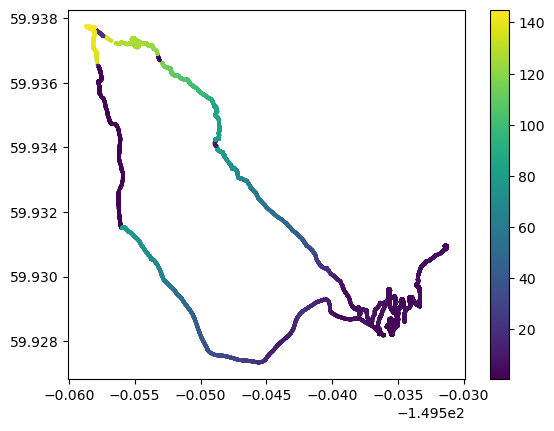

In [13]:
#Plot route and water depth (meters)
route = sl3.df.query("survey == 'primary'")
plt.scatter(route["longitude"], route["latitude"], c=route["water_depth"], s = 3)
plt.colorbar()

In [8]:
#Plot route with augmented coordinates
sl3_augmented = Sonar('/home/kayatroyer/Repositories/Sonar/sonarlight/real_files/Sonar_2024-09-08_14.30.49.sl3', augment_coords=True)

#Data frame now contained augmented x/y and longitude/latitude columns
sl3_augmented.df

KeyboardInterrupt: 

In [27]:
#Plot sonar intensity at water depth (sediment surface)
intensity = sl3.bottom_intensity("primary")
plt.scatter(route["longitude"], route["latitude"], c=intensity, s = 3)
plt.colorbar()

IndexError: index 11903 is out of bounds for axis 0 with size 3084

In [14]:
#Coordinate augmentation smoothens the recorded coordinate which are rounded to the nearest meter.
route_augmented = sl3_augmented.df.query("survey == 'primary'")
plt.scatter(route_augmented["longitude"], route_augmented["latitude"], c="blue", s = 3, label="original")
plt.scatter(route_augmented["longitude_augmented"], route_augmented["latitude_augmented"], c="red", s = 3, label="augmented")
plt.legend(loc='upper right')

NameError: name 'sl3_augmented' is not defined

#### Raw sonar imagery

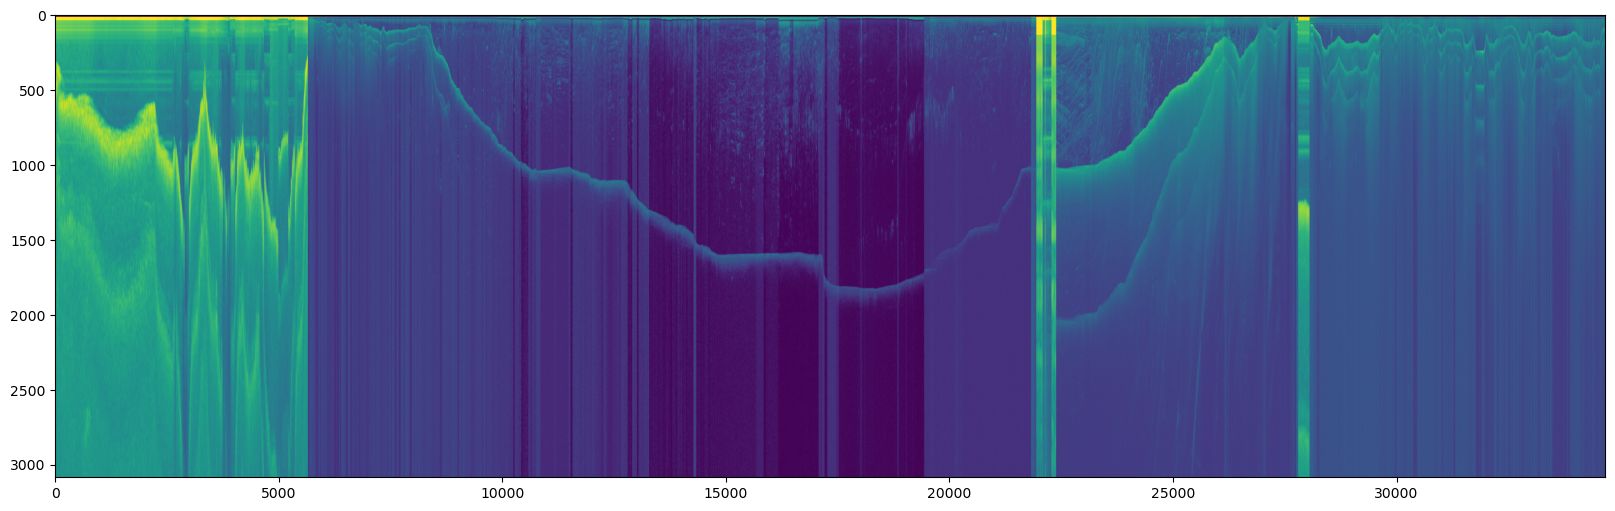

In [19]:
#Plot primary channel
plt.figure(figsize=(20,6))
prim = sl3.image("primary")
plt.imshow(prim.transpose(), aspect= 'auto')

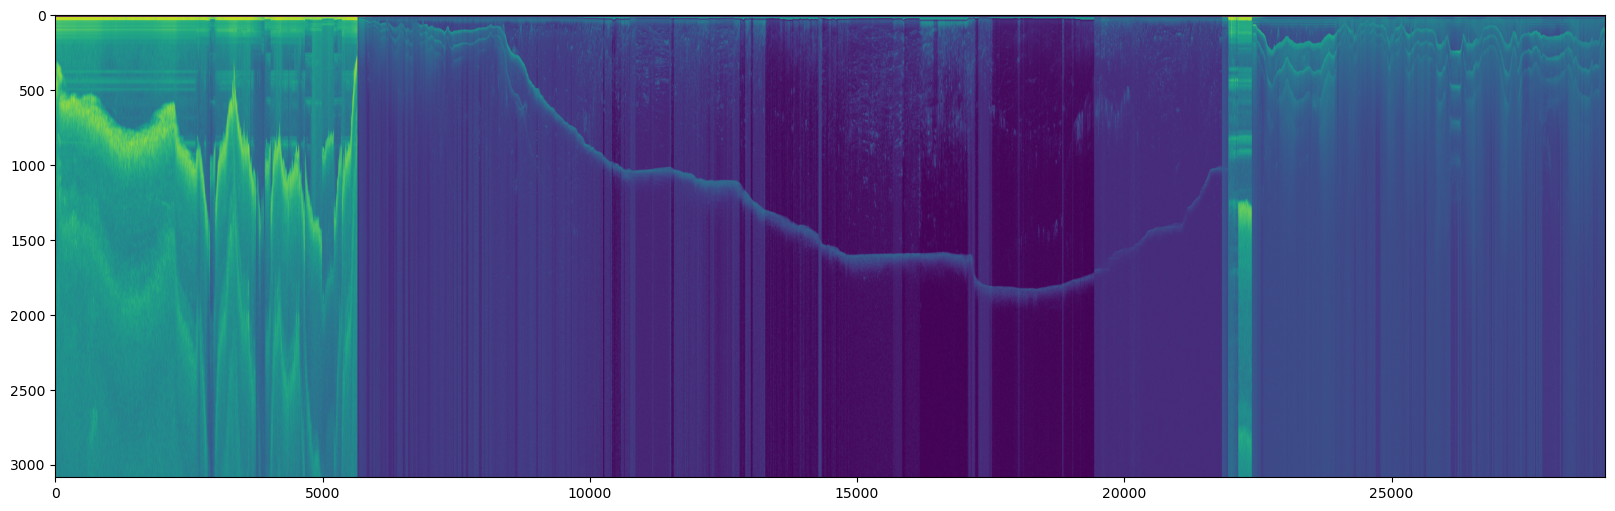

In [20]:
#Plot secondary channel
plt.figure(figsize=(20,6))
secondary = sl3.image("secondary")
plt.imshow(secondary.transpose(), aspect='auto')

#### Water column sonar imagery

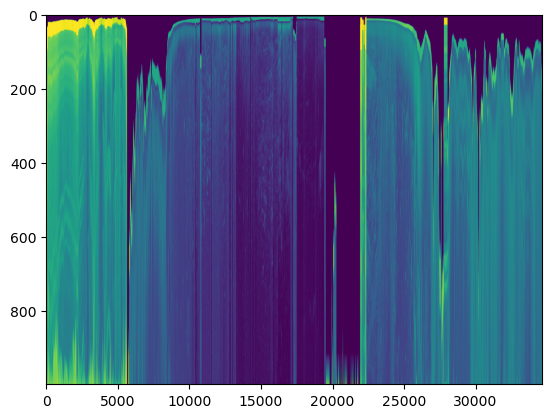

In [16]:
#Plot water column (surface to water_depth) from primary channel
#Individual frames are linearly interpolated of length 'pixels'
#plt.figure(figsize=(10,200))
primary_water = sl3.water("primary", pixels=1000)
plt.imshow(primary_water.transpose(), aspect='auto')

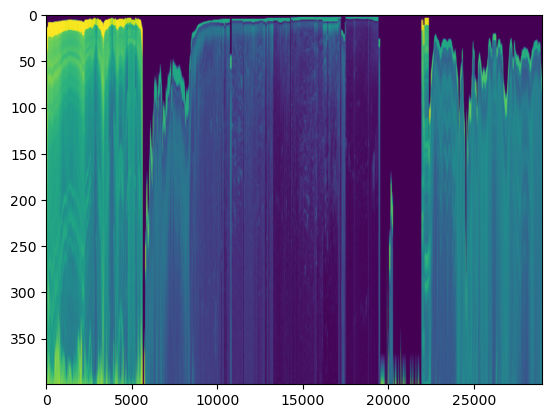

In [17]:
#Plot water column (surface to water_depth) from secondary channel
#Individual frames are linearly interpolated of length 'pixels'
#plt.figure(figsize=(10,200))
secondary_water = sl3.water("secondary", pixels=400)
plt.imshow(secondary_water.transpose(), aspect= 'auto')

#### Bottom sonar imagery

/tmp/ipykernel_23776/684916428.py:5: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(primary_bottom.transpose(), aspect= 'auto')
/tmp/ipykernel_23776/684916428.py:6: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, primary_bottom.shape[1])


(-0.05, 0.05)

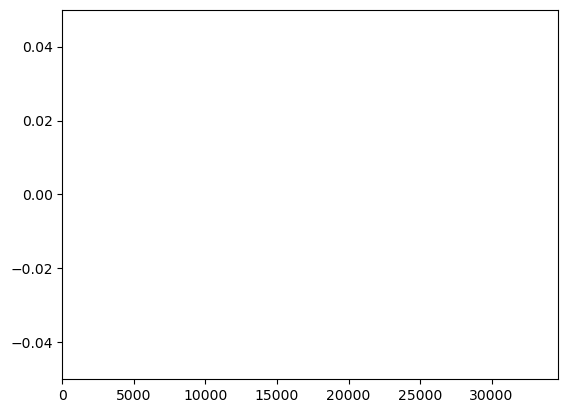

In [ ]:
#Plot bottom column (water_depth to max sonar range) from primary channel
#Individual frames are subsetted to match the minimum length of the bottom frames
#plt.figure(figsize=(5,200#))
primary_bottom = sl3.bottom("primary")
plt.imshow(primary_bottom.transpose(), aspect= 'auto')
plt.ylim(0, primary_bottom.shape[1])

/tmp/ipykernel_23776/811088002.py:4: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(secondary_bottom.transpose())


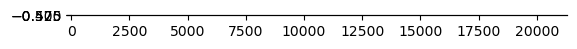

In [ ]:
#Plot bottom column (water_depth to max sonar range) from primary channel
#Individual frames are subsetted to match the minimum length of the bottom frames
secondary_bottom = sl3.bottom("secondary")
plt.imshow(secondary_bottom.transpose())